In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/03_primary/cells_reformated.csv')

In [3]:
cell_groups = ['FS', 'IN', 'PC', 'Others', 'Amygdala']

In [4]:
df_no_da = df.loc[df.cell_group_in_pc.isin(cell_groups)]

In [5]:
ap_cols = []
for col in df.columns:
    if 'AP_vol' in col: ap_cols.append(col)

In [6]:
for col in df.columns:
    if '_50' in col: print(col)

idrest_peak_frequency_stim_50
idrest_spikecount_stim_50
idrest_stim_lenght_stim_50
idrest_vHold_stim_50


In [7]:
outliers_df = pd.DataFrame()

for col in ap_cols:
    df_outliers = df_no_da.loc[(df_no_da[col] > -20) & (df_no_da[col] < -0.3)][[col, 'id', 'cell_group_in_pc']].copy()
    df_outliers['feature'] = col
    df_outliers.rename(columns={col: 'feature_value'}, inplace=True)
    
    outliers_df = pd.concat([outliers_df, df_outliers])


In [8]:
outliers_df

,feature_value,id,cell_group_in_pc,feature
77,-17.058067,121_1,IN,apwaveform_first_AP_voltage_stim_100
121,-11.608125,176_1,IN,apwaveform_first_AP_voltage_stim_140
121,-11.611875,176_1,IN,apwaveform_first_AP_voltage_stim_180
51,-16.231250,103_1,IN,apwaveform_first_AP_voltage_stim_220
121,-8.463752,176_1,IN,apwaveform_first_AP_voltage_stim_220
...,...,...,...,...
132,-4.619774,186_1,Amygdala,idrest_second_AP_voltage_stim_300
139,-17.196245,190_1,Amygdala,idrest_second_AP_voltage_stim_300
176,-19.283297,222_1,PC,idrest_second_AP_voltage_stim_300
273,-19.269089,321_1,Amygdala,idrest_second_AP_voltage_stim_300


In [12]:
outliers_df.id.value_counts()

176_1    21
103_1    14
127_1    11
128_1    11
129_1    11
186_1    10
121_1     9
109_1     8
113_1     6
190_1     4
87_1      4
88_1      4
91_1      2
92_1      2
115_1     2
222_1     2
71_1      1
74_1      1
166_1     1
321_1     1
324_1     1
Name: id, dtype: int64

In [9]:
outliers_df.to_csv('ap_potential_above_minus_twenty_V2.csv')

In [10]:
outliers_df.feature_value < -0.3

77     True
121    True
121    True
51     True
121    True
       ... 
132    True
139    True
176    True
273    True
275    True
Name: feature_value, Length: 126, dtype: bool

<AxesSubplot:ylabel='Frequency'>

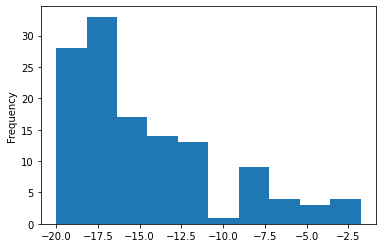

In [11]:
outliers_df.feature_value.plot.hist()